## Training on the Flickr candidate dataset
This notebook contains the relevant code for reproducing the following figures in the paper "*Image recognition from raw labels collected without annotators*":

- Figure 2
- Figure 7 (Appendix)

In [1]:
%matplotlib inline
import pathlib
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

import sys
repo_root = str((pathlib.Path.cwd() / 'code').resolve())
sys.path.append(repo_root)
import plot_utils

out_dir = pathlib.Path.cwd() / 'results/'

### Figure 2: Training and test accuracy curves for 100-class ImageNet classification problem
- Classification accuracies of the model trained on both the candidate dataset constructed simply from Flickr searches and the original, clean ImageNet training set show that training on the candidate images achieves $4.44\%$ better performance.

In [2]:
# read results for the accuracy plots
out_files = {'flickr': out_dir / 'flickr_cls100' / 'log.json', 
             'imagenet': out_dir / 'imagenet_cls100' / 'log.json'}
epoch_arrs, acc_logs = {}, {}
for cur_set, out_file in out_files.items():
    epc, acc = plot_utils.readJsonLog(out_file)
    epoch_arrs.update({cur_set: np.array(epc)})
    acc_logs.update({cur_set: {'train': np.array(acc['train']), 'test': np.array(acc['test'])}})

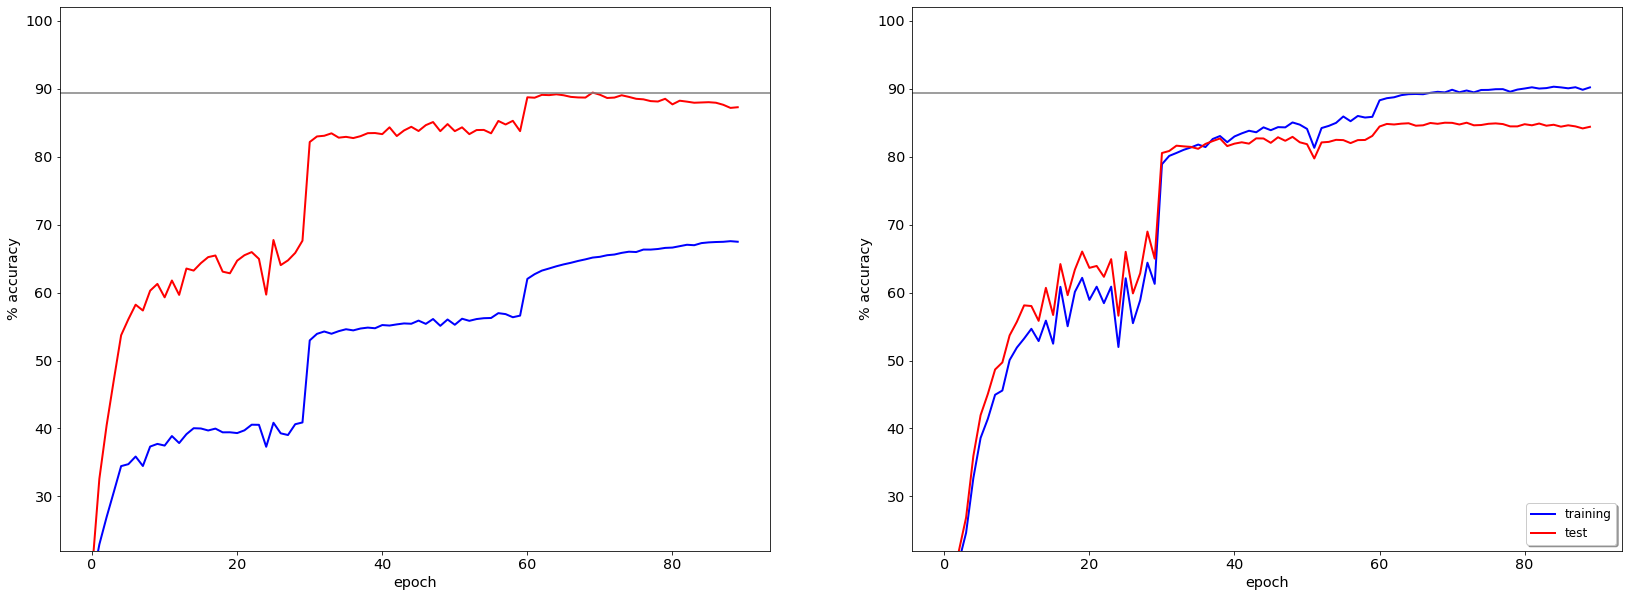

In [3]:
# plot setup
xrange = 90
plot_setup = {}
plot_setup['colors'] = ['blue', 'red']
plot_setup['layers'] = ['training', 'test']


fig = plt.figure(figsize=(28,10))
        
# plot training curvers
ax1 = plt.subplot(121)  
for i, (cur_set, cur_acc) in enumerate(acc_logs['flickr'].items()):
    ax1.plot(epoch_arrs['flickr'][:xrange], cur_acc[:xrange], lw = 2,
                 color = plot_setup['colors'][i], 
                 label = plot_setup['layers'][i])


ax2 = plt.subplot(122)  
for i, (cur_set, cur_acc) in enumerate(acc_logs['imagenet'].items()):
    ax2.plot(epoch_arrs['imagenet'][:xrange], cur_acc[:xrange], lw = 2,
                 color = plot_setup['colors'][i], 
                 label = plot_setup['layers'][i])
    
# plot metadata
ax2.legend(loc=4, bbox_to_anchor=(1, 0), fontsize='large',
          frameon=True, fancybox=True, shadow=True, ncol=1)

ax_list = [ax1, ax2]
for cur_ax in ax_list: cur_ax.set_xlabel('epoch')
for cur_ax in ax_list: cur_ax.set_ylabel('% accuracy')
for cur_ax in ax_list: cur_ax.set_ylim((22, 102))
for cur_ax in ax_list: cur_ax.axhline(89.44, color='gray')

# show plot
plt.show()

### Figure 7 (Appendix): Training and test accuracy curves for 135-class ImageNet classification problem
- Classification accuracies on the training and test sets for the 135-class subset, where the Flickr candidate dataset has semantic overlaps. Due to degraded test performance of the classes with semantic overlaps, the overall test accuracy when the model is trained on the candidate dataset is notably reduced.

In [4]:
# read results for the accuracy plots
out_files = {'flickr': out_dir / 'flickr_cls135' / 'log.json', 
             'imagenet': out_dir / 'imagenet_cls135' / 'log.json'}
epoch_arrs, acc_logs = {}, {}
for cur_set, out_file in out_files.items():
    epc, acc = plot_utils.readJsonLog(out_file)
    epoch_arrs.update({cur_set: np.array(epc)})
    acc_logs.update({cur_set: {'train': np.array(acc['train']), 'test': np.array(acc['test'])}})

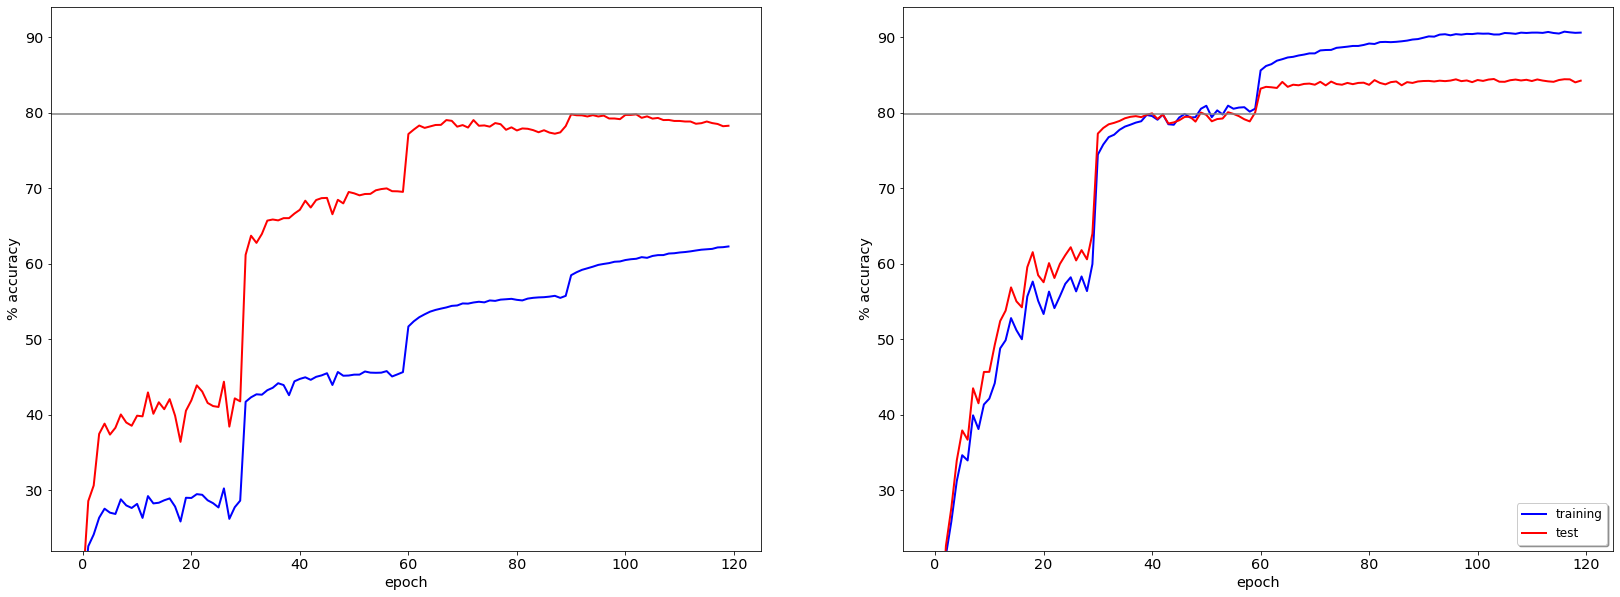

In [5]:
# plot setup
xrange = 120
plot_setup = {}
plot_setup['colors'] = ['blue', 'red']
plot_setup['layers'] = ['training', 'test']


# plot Jacobian
fig = plt.figure(figsize=(28,10))
        
# plot training curvers
ax1 = plt.subplot(121)  
for i, (cur_set, cur_acc) in enumerate(acc_logs['flickr'].items()):
    ax1.plot(epoch_arrs['flickr'][:xrange], cur_acc[:xrange], lw = 2,
                 color = plot_setup['colors'][i], 
                 label = plot_setup['layers'][i])


ax2 = plt.subplot(122)  
for i, (cur_set, cur_acc) in enumerate(acc_logs['imagenet'].items()):
    ax2.plot(epoch_arrs['imagenet'][:xrange], cur_acc[:xrange], lw = 2,
                 color = plot_setup['colors'][i], 
                 label = plot_setup['layers'][i])
    
# plot metadata
ax2.legend(loc=4, bbox_to_anchor=(1, 0), fontsize='large',
          frameon=True, fancybox=True, shadow=True, ncol=1)

ax_list = [ax1, ax2]
for cur_ax in ax_list: cur_ax.set_xlabel('epoch')
for cur_ax in ax_list: cur_ax.set_ylabel('% accuracy')
for cur_ax in ax_list: cur_ax.set_ylim((22, 94))
for cur_ax in ax_list: cur_ax.axhline(79.81, color='gray')

# show plot
plt.show()